In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="whitegrid")
import random
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
LABELS = ["Normal", "Fraud"]
import plotly
import time

# Classifier Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [7]:
file_path = r'/Users/joelsabiti/Desktop/practicals/cereals/ainea.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

In [8]:
df=df.drop('Residence',axis=1)

In [9]:
df['Marital_Status'].unique()

array(['married ', 'single ', 'divorced ', 'seperated ', 'maried ',
       'mmaried ', 'divoced ', 'sperated ', 'window ', 'window', 'widow ',
       'marrid ', 'marrried ', 'dovorced', 'divocred ', 'maried  ',
       'sinle '], dtype=object)

In [10]:
status={
    'single ': 'single',
    'sinle ': 'single',
    'married ':'married', 
    'marrid ':'married',
    'maried ':'married', 
    'maried  ':'married',
    'marrried ':'married',
    'mmaried ':'married',
    'sperated ':'divorced',
    'seperated ':'divorced',
    'divorced ':'divorced',
    'divoced ' :'divorced', 
    'divocred ':'divorced', 
    'dovorced':'divorced',
    'window ':'widowed',
    'widow ':'widowed',
    'window':'widowed',
    
}

In [11]:
df['Marital_Status']=df['Marital_Status'].replace(status)

In [12]:
df['Marital_Status'].value_counts()

married     543
single      363
divorced     16
widowed       7
Name: Marital_Status, dtype: int64

In [13]:
marital_map = {
    'single':1,
    'married':2,
    'widowed':3,
    'divorced':4,
}
df['Marital_Status']=df['Marital_Status'].map(marital_map)

In [14]:
df['Occupation'].unique()

array(['None ', 'Employed ', 'None'], dtype=object)

In [15]:
occupation_status={
    'Employed ':'Employed',
    'None':'Unemployed',
    'None ':'Unemployed',
}
df['Occupation']=df['Occupation'].replace(occupation_status)

In [16]:
occupation_map = {
    'Employed':1,
    'Unemployed':0,
}
df['Occupation']=df['Occupation'].map(occupation_map)
df['Occupation'].unique()

array([0, 1])

In [17]:
df.drop('Education', axis=1, inplace=True)

In [18]:
df['HIV_Status'].value_counts()

POS    627
NEG    283
ND      19
Name: HIV_Status, dtype: int64

In [19]:
hiv_map = {
   'NEG':1,
    'POS':2,
    'ND':3,
}

df['HIV_Status']=df['HIV_Status'].map(hiv_map)
df['HIV_Status'].unique()

array([1, 2, 3])

In [20]:
df['Bloody_Vaginal_Discharge'].unique()

array(['No', 'yes ', 'Yes '], dtype=object)

In [21]:
discharge_map = {
    'No':0,
    'yes ':1,
    'Yes ':1,
}

df['Bloody_Vaginal_Discharge']=df['Bloody_Vaginal_Discharge'].map(discharge_map)

In [22]:
df['Bloody_Vaginal_Discharge'].unique()

array([0, 1])

In [23]:
df['STI_Status'].unique()

array(['no ', 'no', 'yes', 'No', 'YES', 'NO', 'yes ', 'NO ', 'Yes', 'np',
       'n o', 'YES '], dtype=object)

In [24]:
STI_STATUS={
    'No':0,
    'no':0,
    'n o':0,
    'NO ':0,
    'YES':1,
    'no ':0,
    'NO':0,
    'Yes':1,
    'np':0,
    'yes':1,
    'yes ':1,
    'YES ':1,
    
}

In [25]:
df['STI_Status']=df['STI_Status'].map(STI_STATUS)

In [26]:
df['STI_Status'].unique()

array([0, 1])

In [27]:
df['Family_History_Of_Ca'].unique()

array(['NO', 'yes', 'YES', 'ND', 'NO ', 'Yes'], dtype=object)

In [28]:
history ={
   'yes':1,
    'NO':0,
    'NO ':0,
    'Yes':1,
    'YES':1,
    'ND':0,
}

In [29]:
df['Family_History_Of_Ca'].value_counts()

NO     699
YES    190
yes     34
ND       2
NO       2
Yes      2
Name: Family_History_Of_Ca, dtype: int64

In [30]:
df['Family_History_Of_Ca']=df['Family_History_Of_Ca'].map(history)

In [31]:
df['Family_History_Of_Ca'].unique()

array([0, 1])

In [32]:
df['Bleeding_History'].unique()

array(['No', 'yes ', 'Yes '], dtype=object)

In [33]:
history2={
    'No':0,
    'yes ':1,
    'Yes ':1,
}
df['Bleeding_History']=df['Bleeding_History'].map(history2)
df['Bleeding_History'].unique()

array([0, 1])

In [34]:
df['History_Of_STIs'].unique()

array(['yes ', 'no ', 'Yes ', 'No', 'NO ', ' No ', 'YES '], dtype=object)

In [35]:
history3={
    'Yes ':1,
    ' No ':0,
    'no ':0,
    'NO ':0,
    'yes ':1,
    'YES ':1,
    'No':0,
}
df['History_Of_STIs']=df['History_Of_STIs'].map(history3)
df['History_Of_STIs'].unique()

array([1, 0])

In [36]:
df['Use_of_IUDs'].unique()

array(['no ', 'no', 'yes', 'yes ', 'NO', 'NO ', 'No', 'YES', 'YES ', 'np',
       'n'], dtype=object)

In [37]:
history4={
    'yes':1,
    'No':0,
    'no ':0,
    'no':0,
    'NO':0,
    'YES':0,
    'NO ':0,
    'n':0,
    'yes ':1,
    'YES ':1,
    'np':0,
}
df['Use_of_IUDs']=df['Use_of_IUDs'].map(history4)
df['Use_of_IUDs'].unique()

array([0, 1])

In [38]:
df['Age_At_First_Sexual_Intercourse'].unique()

array([ 24,  22,  16,  18,  17,  15,  19,  21, 117,  20,  14,  23,  13,
        26])

In [39]:
age = {
       117:17
}
df['Age_At_First_Sexual_Intercourse']=df['Age_At_First_Sexual_Intercourse'].replace(age)

In [40]:
df['Age_At_First_Sexual_Intercourse'].unique()

array([24, 22, 16, 18, 17, 15, 19, 21, 20, 14, 23, 13, 26])

In [41]:
df['HPV_STATUS'].unique()

array(['NEG', 'NR', 'POS', 'NEG ', 'ND ', 'pos', 'ND', 'POS '],
      dtype=object)

In [42]:
cancer={
   'NEG':0,
    'NR':3,
    'ND':3,
    'ND ':3,
    'POS':1,
    'NEG ':0,
    'pos':1,
    'POS ':1,
}
df['HPV_STATUS']=df['HPV_STATUS'].replace(cancer)
df['HPV_STATUS'].unique()

array([0, 3, 1])

In [43]:
count=df['HPV_STATUS'].value_counts()
print(count)

0    840
1     83
3      6
Name: HPV_STATUS, dtype: int64


In [44]:
df = df[df['HPV_STATUS'] != 3]

In [45]:
count=df['HPV_STATUS'].value_counts()
print(count)

0    840
1     83
Name: HPV_STATUS, dtype: int64


In [46]:
count=df['Circumcised_Partner'].value_counts()
print(count)

Yes    846
NO      77
Name: Circumcised_Partner, dtype: int64


In [47]:
circumcised = {
    'Yes':1,
    'NO':0,    
}
df['Circumcised_Partner']=df['Circumcised_Partner'].map(circumcised)
df['Circumcised_Partner'].unique()

array([1, 0])

In [48]:
count=df['Smoking'].value_counts()
print(count)

None      839
Smokes     84
Name: Smoking, dtype: int64


In [49]:
smoking = {
    'None':0,
    'Smokes':1,    
}
df['Smoking']=df['Smoking'].map(smoking)
df['Smoking'].unique()

array([0, 1])

In [50]:
 count=df['Multiple_Sex_Partners'].value_counts()
print(count) 

NO     698
YES    225
Name: Multiple_Sex_Partners, dtype: int64


In [51]:
partners = {
    'NO':0,
    'YES':1,    
}
df['Multiple_Sex_Partners']=df['Multiple_Sex_Partners'].map(partners)
df['Multiple_Sex_Partners'].unique()

array([0, 1])

In [52]:
df['Bloody_Vaginal_Discharge'].unique()

array([0, 1])

Shapiro-Wilk Test:
Statistic: 0.9820540547370911
p-value: 3.141987336974239e-09
Is the data normally distributed (p-value < alpha)? False

D'Agostino and Pearson's Test:
Statistic: 17.96269832383553
p-value: 0.00012573309870953406
Is the data normally distributed (p-value < alpha)? False


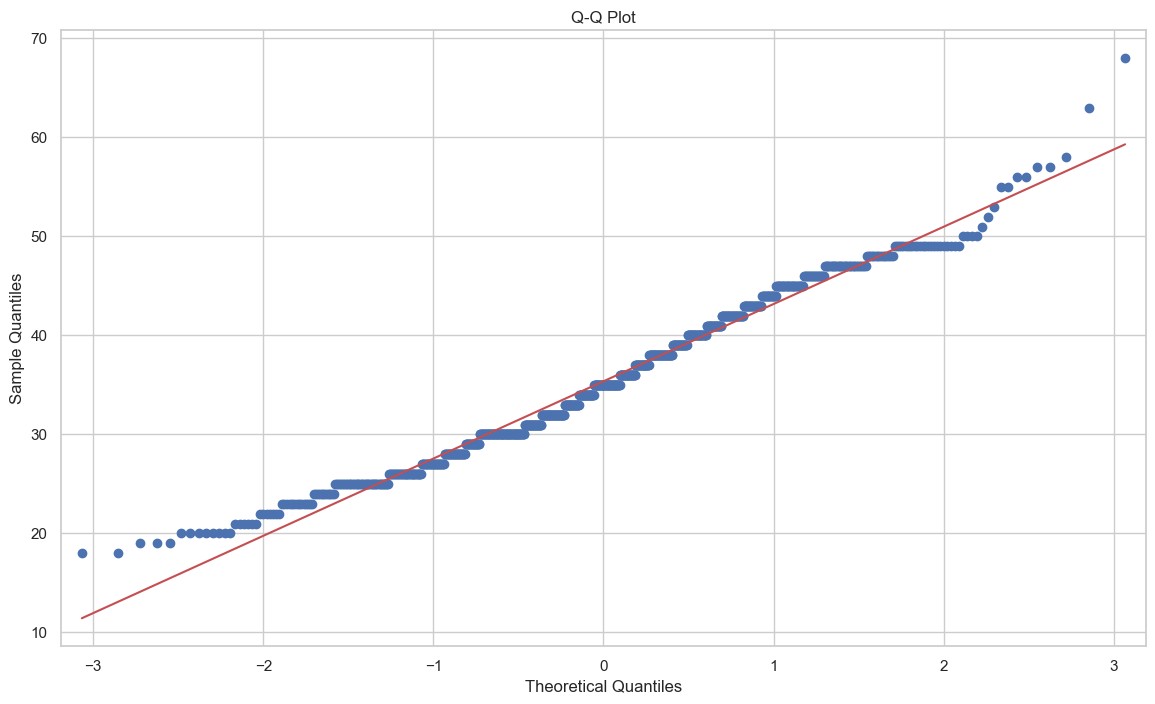

In [53]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

statistic, p_value = stats.shapiro(df['Age'])
alpha = 0.05
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)


k2, p_value = stats.normaltest(df['Age'])
print("\nD'Agostino and Pearson's Test:")
print("Statistic:", k2)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)

sm.qqplot(df['Age'], line='s')
plt.title("Q-Q Plot")
plt.show()


In [54]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(df['Age'], df['HPV_STATUS'], alternative='two-sided')
alpha = 0.05
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Are the distributions significantly different (p-value < alpha)?", p_value < alpha)

Mann-Whitney U Test:
Statistic: 851929.0
p-value: 0.0
Are the distributions significantly different (p-value < alpha)? True


Meaning the data is not normaly distributed and that age is statistically significant to HPV

Shapiro-Wilk Test:
Statistic: 0.951757550239563
p-value: 7.929718634891827e-17
Is the data normally distributed (p-value < alpha)? False

D'Agostino and Pearson's Test:
Statistic: 50.5004598820929
p-value: 1.0813454814278793e-11
Is the data normally distributed (p-value < alpha)? False


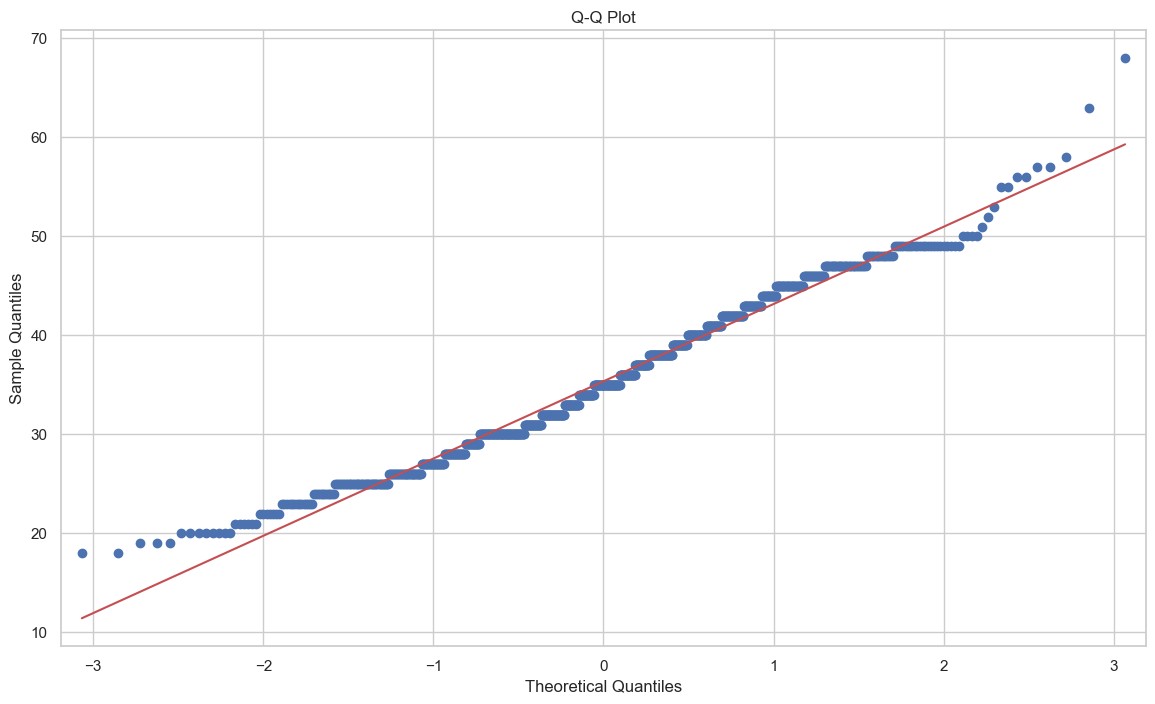

In [55]:
statistic, p_value = stats.shapiro(df['Age_At_First_Sexual_Intercourse'])
alpha = 0.05
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)


k2, p_value = stats.normaltest(df['Age_At_First_Sexual_Intercourse'])
print("\nD'Agostino and Pearson's Test:")
print("Statistic:", k2)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)

sm.qqplot(df['Age'], line='s')
plt.title("Q-Q Plot")
plt.show()


In [56]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(df['Age_At_First_Sexual_Intercourse'], df['HPV_STATUS'], alternative='two-sided')
alpha = 0.05
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Are the distributions significantly different (p-value < alpha)?", p_value < alpha)

Mann-Whitney U Test:
Statistic: 851929.0
p-value: 0.0
Are the distributions significantly different (p-value < alpha)? True


Age_At_First_Sexual_Intercourse is statistically significant and has an effect on HPV

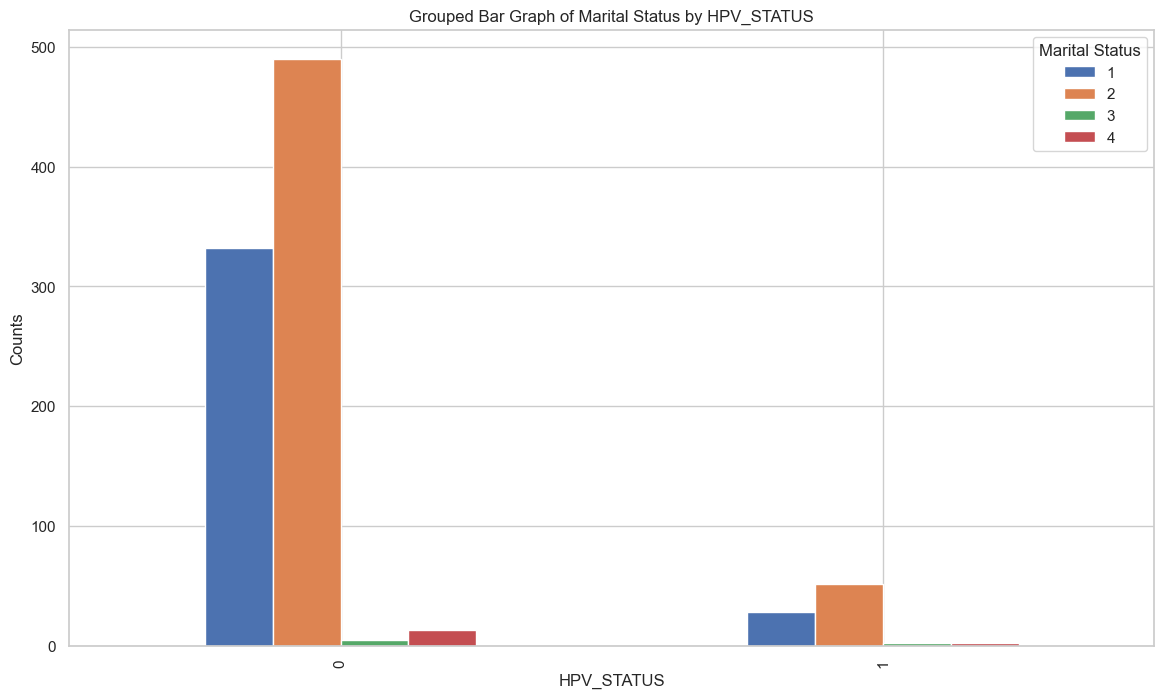

In [57]:
import matplotlib.pyplot as plt

counts = df['Marital_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Marital_Status'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Marital_Status'].unique()]))

grouped_counts = grouped_counts.unstack()

# Plot the grouped bar graph
grouped_counts.plot(kind='bar')
plt.xlabel('HPV_STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Marital Status by HPV_STATUS')
plt.legend(title='Marital Status')

# Show the graph
plt.show()

In [58]:
df.columns

Index(['Marital_Status', 'Occupation', 'Age', 'HIV_Status', 'STI_Status',
       'Bloody_Vaginal_Discharge', 'Family_History_Of_Ca', 'Bleeding_History',
       'History_Of_STIs', 'Use_of_IUDs', 'Age_At_First_Sexual_Intercourse',
       'Multiple_Sex_Partners', 'Smoking', 'Circumcised_Partner',
       'HPV_STATUS'],
      dtype='object')

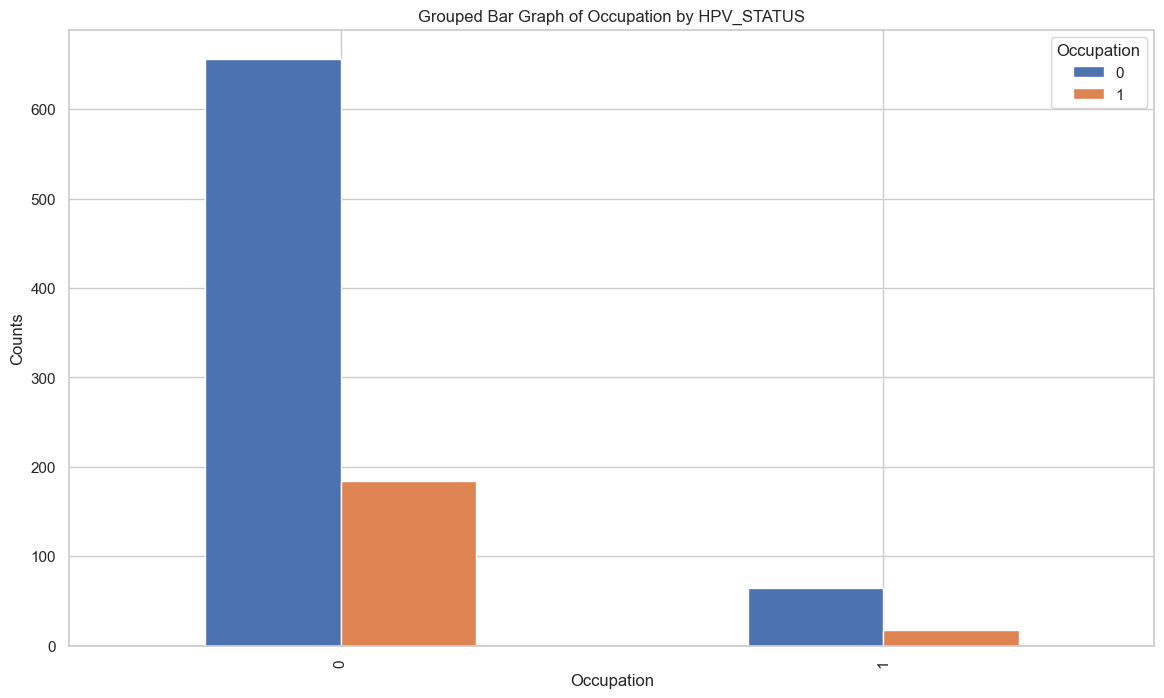

In [59]:
counts = df['Occupation'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Occupation'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Occupation'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Occupation by HPV_STATUS')
plt.legend(title='Occupation')

# Show the graph
plt.show()

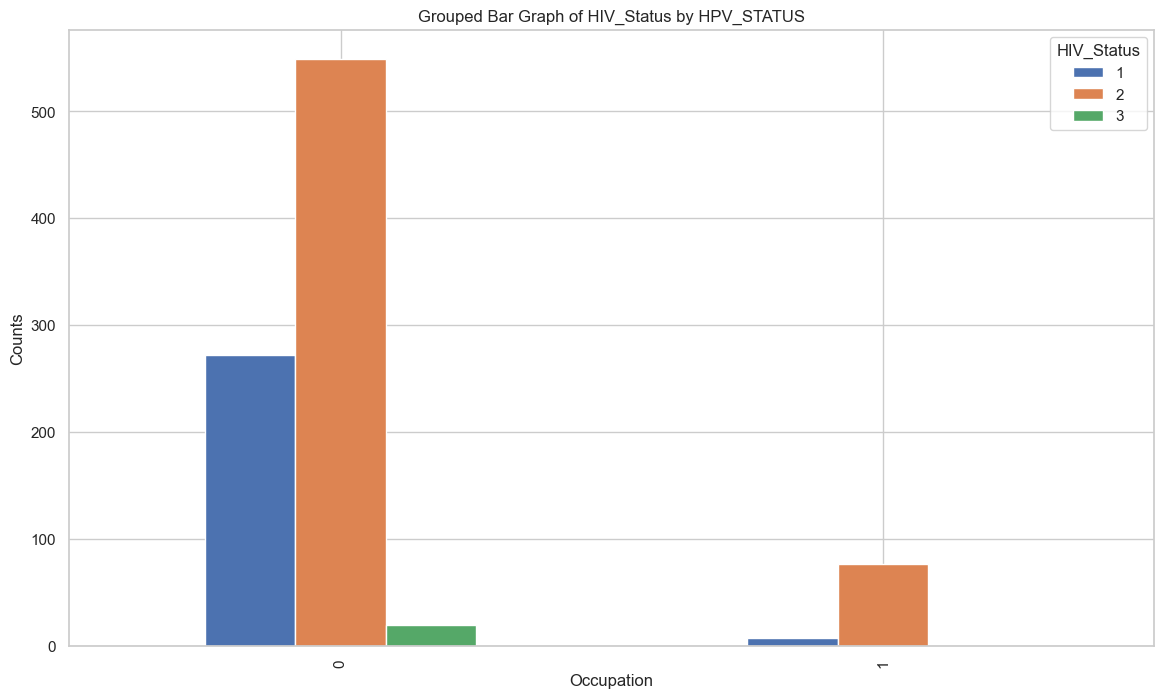

In [60]:
counts = df['HIV_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['HIV_Status'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['HIV_Status'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of HIV_Status by HPV_STATUS')
plt.legend(title='HIV_Status')

# Show the graph
plt.show()

In [61]:
# Drop rows where 'Variable_1' is equal to 20
df = df.drop(df[df['HIV_Status'] ==3].index)

drop HIV = 3 that is NA

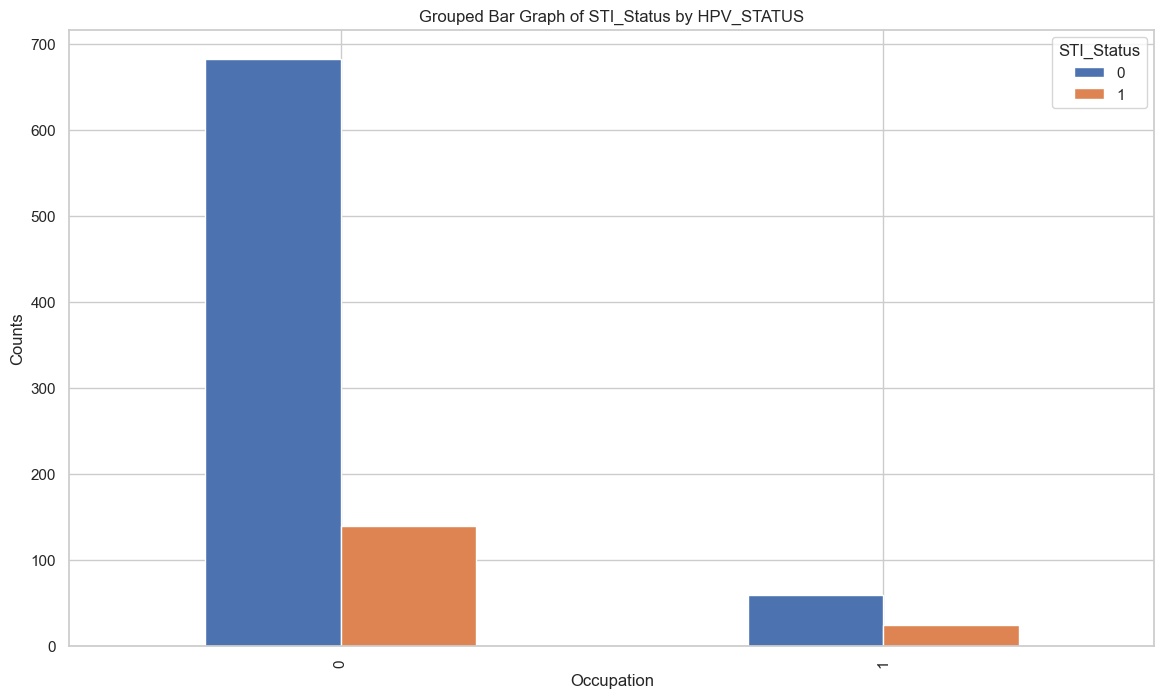

In [62]:
counts = df['STI_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['STI_Status'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['STI_Status'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of STI_Status by HPV_STATUS')
plt.legend(title='STI_Status')

# Show the graph
plt.show()

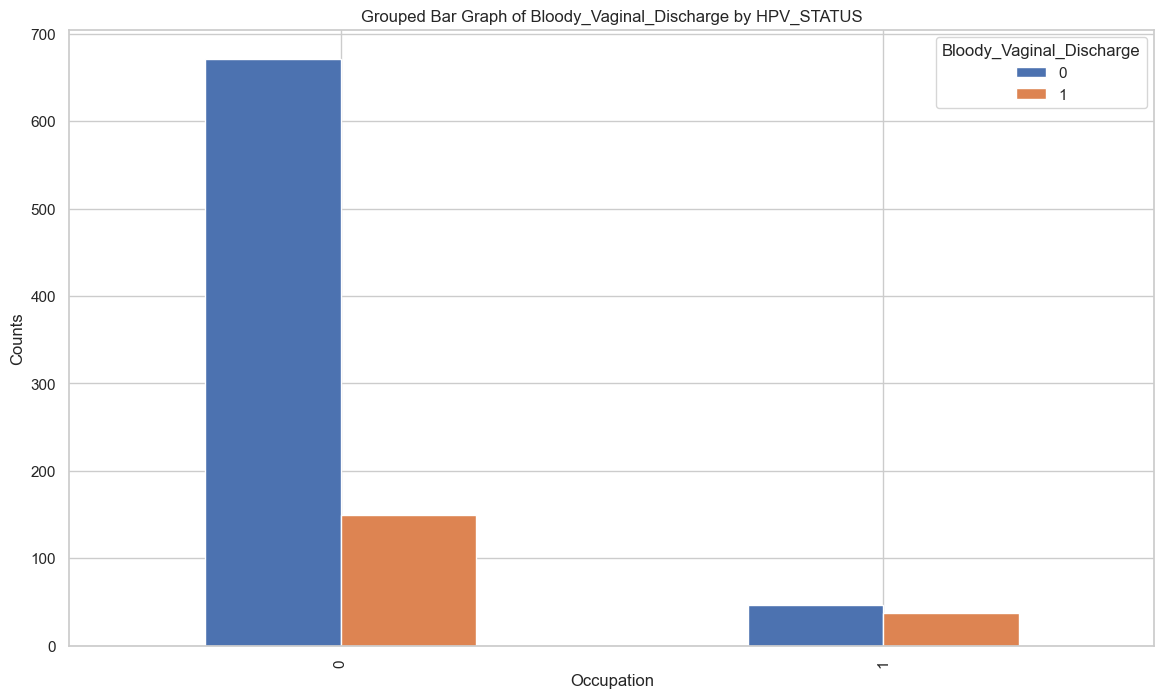

In [63]:
counts = df['STI_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Bloody_Vaginal_Discharge'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Bloody_Vaginal_Discharge'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Bloody_Vaginal_Discharge by HPV_STATUS')
plt.legend(title='Bloody_Vaginal_Discharge')

# Show the graph
plt.show()

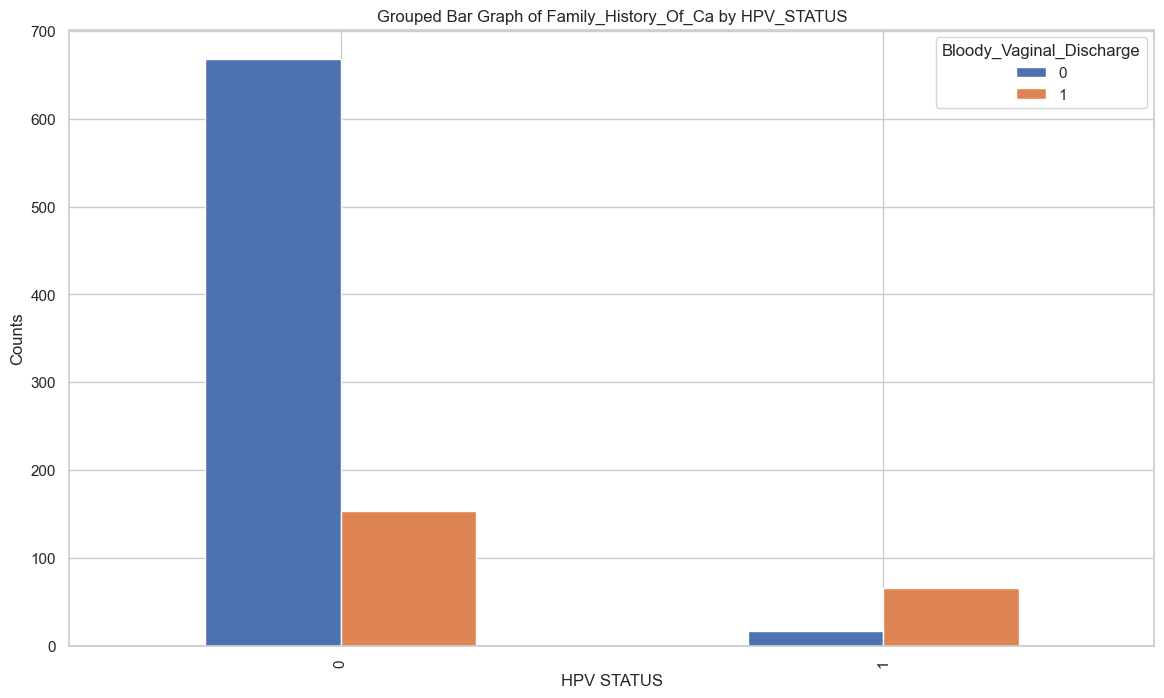

In [64]:
counts = df['STI_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Family_History_Of_Ca'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Family_History_Of_Ca'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('HPV STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Family_History_Of_Ca by HPV_STATUS')
plt.legend(title='Bloody_Vaginal_Discharge')

# Show the graph
plt.show()

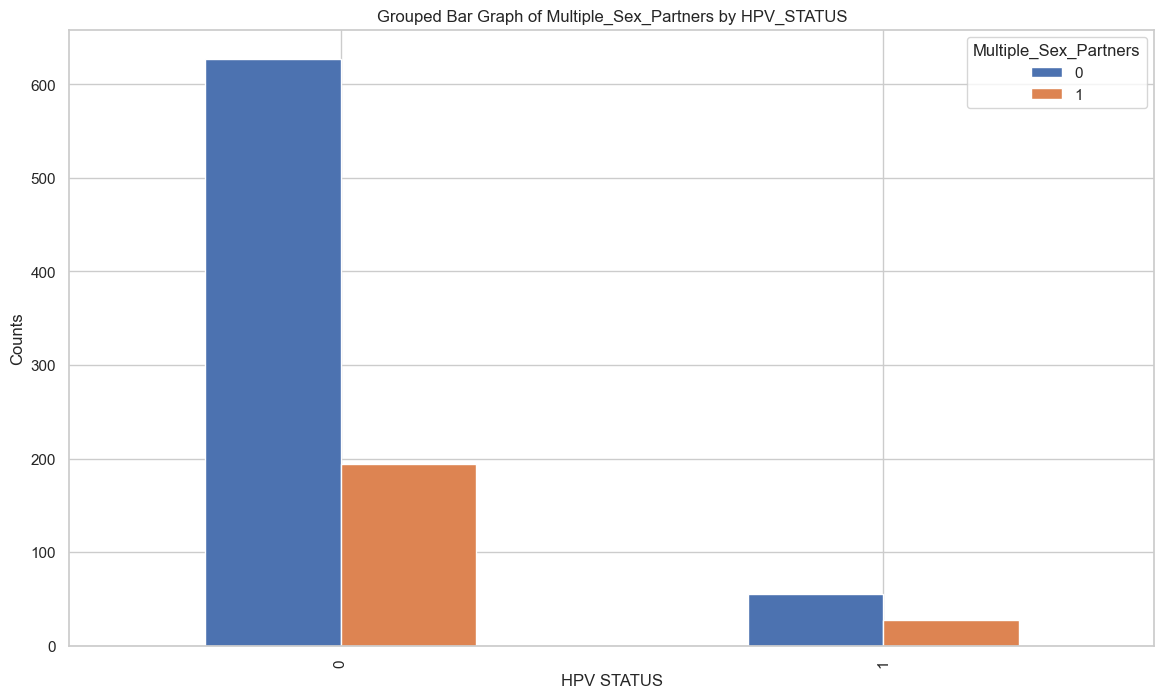

In [65]:

counts = df['Multiple_Sex_Partners'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Multiple_Sex_Partners'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Multiple_Sex_Partners'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('HPV STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Multiple_Sex_Partners by HPV_STATUS')
plt.legend(title='Multiple_Sex_Partners')

# Show the graph
plt.show()

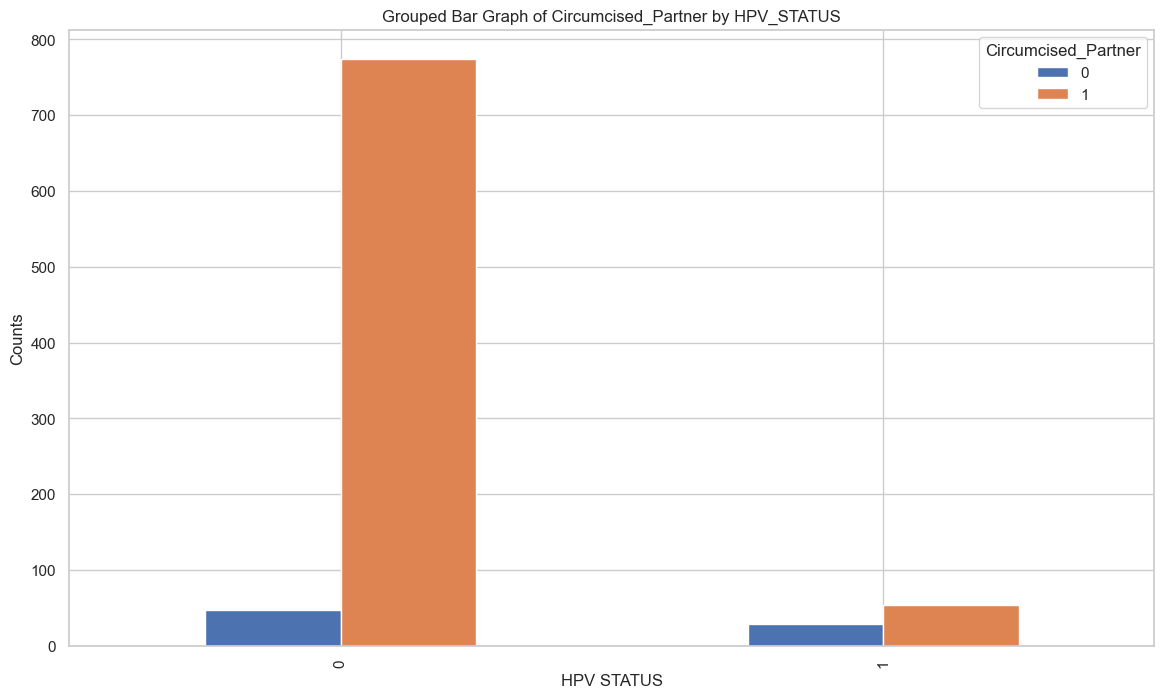

In [66]:
counts = df['Circumcised_Partner'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Circumcised_Partner'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Circumcised_Partner'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('HPV STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Circumcised_Partner by HPV_STATUS')
plt.legend(title='Circumcised_Partner')

# Show the graph
plt.show()


In [67]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_columns = [col for col in df.columns if col != 'HPV_STATUS']

# Perform chi-square test for each categorical variable against 'HPV_STATUS'
alpha = 0.05
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['HPV_STATUS'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for '{col}' against 'HPV_STATUS':")
    print("Chi2 statistic:", chi2)
    print("p-value:", p_value)
    print("Are the variables associated (p-value < alpha)?", p_value < alpha)
    print("----------------------------------------------------")


Chi-square test for 'Marital_Status' against 'HPV_STATUS':
Chi2 statistic: 4.297518387296588
p-value: 0.23107799820711575
Are the variables associated (p-value < alpha)? False
----------------------------------------------------
Chi-square test for 'Occupation' against 'HPV_STATUS':
Chi2 statistic: 0.0
p-value: 1.0
Are the variables associated (p-value < alpha)? False
----------------------------------------------------
Chi-square test for 'Age' against 'HPV_STATUS':
Chi2 statistic: 175.97762728865052
p-value: 1.1952350205797107e-18
Are the variables associated (p-value < alpha)? True
----------------------------------------------------
Chi-square test for 'HIV_Status' against 'HPV_STATUS':
Chi2 statistic: 20.404767866436472
p-value: 6.267345446509451e-06
Are the variables associated (p-value < alpha)? True
----------------------------------------------------
Chi-square test for 'STI_Status' against 'HPV_STATUS':
Chi2 statistic: 6.537522994021666
p-value: 0.010562231458713704
Are the v

Marital status, Occupation, Multiple Sex Partners, smoking not statistically significant

In [68]:
cols_to_drop = ['Marital_Status','Occupation','Multiple_Sex_Partners','Smoking']

In [69]:
df=df.drop(cols_to_drop, axis=1)

In [70]:
df

,Age,HIV_Status,STI_Status,Bloody_Vaginal_Discharge,Family_History_Of_Ca,Bleeding_History,History_Of_STIs,Use_of_IUDs,Age_At_First_Sexual_Intercourse,Circumcised_Partner,HPV_STATUS
0,28,1,0,0,0,0,1,0,24,1,0
1,32,1,0,0,0,0,0,0,22,0,0
2,30,2,0,1,1,1,1,0,16,1,0
4,36,1,1,1,0,1,0,0,17,1,0
5,36,2,0,1,0,1,0,0,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...
924,40,2,1,0,0,0,0,0,15,1,0
925,43,2,0,0,0,0,0,0,16,1,0
926,31,2,1,0,0,0,0,1,16,1,0
927,35,2,0,0,0,0,0,0,18,1,0


In [71]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Fit and transform the column using the MinMaxScaler
df['Normalized_Age'] = scaler.fit_transform(df[['Age']])


In [72]:
df['Normalized_Age_At_First_Sexual_Intercourse'] = scaler.fit_transform(df[['Age_At_First_Sexual_Intercourse']])

In [73]:
df

,Age,HIV_Status,STI_Status,Bloody_Vaginal_Discharge,Family_History_Of_Ca,Bleeding_History,History_Of_STIs,Use_of_IUDs,Age_At_First_Sexual_Intercourse,Circumcised_Partner,HPV_STATUS,Normalized_Age,Normalized_Age_At_First_Sexual_Intercourse
0,28,1,0,0,0,0,1,0,24,1,0,-0.636364,2.333333
1,32,1,0,0,0,0,0,0,22,0,0,-0.272727,1.666667
2,30,2,0,1,1,1,1,0,16,1,0,-0.454545,-0.333333
4,36,1,1,1,0,1,0,0,17,1,0,0.090909,0.000000
5,36,2,0,1,0,1,0,0,17,1,0,0.090909,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,40,2,1,0,0,0,0,0,15,1,0,0.454545,-0.666667
925,43,2,0,0,0,0,0,0,16,1,0,0.727273,-0.333333
926,31,2,1,0,0,0,0,1,16,1,0,-0.363636,-0.333333
927,35,2,0,0,0,0,0,0,18,1,0,0.000000,0.333333


In [74]:
cols_to_drop=['Age','Age_At_First_Sexual_Intercourse']

In [75]:
df=df.drop(cols_to_drop, axis=1)

In [76]:
df

,HIV_Status,STI_Status,Bloody_Vaginal_Discharge,Family_History_Of_Ca,Bleeding_History,History_Of_STIs,Use_of_IUDs,Circumcised_Partner,HPV_STATUS,Normalized_Age,Normalized_Age_At_First_Sexual_Intercourse
0,1,0,0,0,0,1,0,1,0,-0.636364,2.333333
1,1,0,0,0,0,0,0,0,0,-0.272727,1.666667
2,2,0,1,1,1,1,0,1,0,-0.454545,-0.333333
4,1,1,1,0,1,0,0,1,0,0.090909,0.000000
5,2,0,1,0,1,0,0,1,0,0.090909,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
924,2,1,0,0,0,0,0,1,0,0.454545,-0.666667
925,2,0,0,0,0,0,0,1,0,0.727273,-0.333333
926,2,1,0,0,0,0,1,1,0,-0.363636,-0.333333
927,2,0,0,0,0,0,0,1,0,0.000000,0.333333


In [77]:
df['HPV_STATUS'].value_counts()

0    821
1     83
Name: HPV_STATUS, dtype: int64

UNDER SAMPLING THE MAJORITY

In [78]:
df = df.sample(frac=1)
cancer = df.loc[df['HPV_STATUS']==1]
no_cancer=df.loc[df['HPV_STATUS']==0][:83]

In [79]:
normal_distributed_df=pd.concat([cancer, no_cancer],axis=0, ignore_index=True)

In [80]:
normal_df = shuffle(normal_distributed_df, random_state=42)

In [81]:
from sklearn.model_selection import train_test_split
X = normal_df.drop(columns=['HPV_STATUS'])
y = normal_df['HPV_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

 So, we have a heavily imbalanced dataset. we could simply create a balanced dataset by collecting the same number of observations from the majority class to be equal to the minority class, but, we would be losing a lot of observations from the majority class. we could use the ensemble method or SMOTE or focal loss

In [82]:
 y_train.value_counts()

1    66
0    66
Name: HPV_STATUS, dtype: int64

In [83]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.82      0.87        17
    Positive       0.84      0.94      0.89        17

    accuracy                           0.88        34
   macro avg       0.89      0.88      0.88        34
weighted avg       0.89      0.88      0.88        34



In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random = RandomForestClassifier()
random.fit(X_train, y_train)

y_pred = random.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.82      0.85        17
    Positive       0.83      0.88      0.86        17

    accuracy                           0.85        34
   macro avg       0.85      0.85      0.85        34
weighted avg       0.85      0.85      0.85        34



UNDER_SAMPLING

In [85]:
df_class_0 = df[df['HPV_STATUS']==0][:83]
df_class_1 = df[df['HPV_STATUS']==1]

In [86]:
new_df=pd.concat([df_class_0,df_class_1], axis=0, ignore_index=True)

In [87]:
normal_df = shuffle(new_df, random_state=42)

In [88]:
normal_df.shape

(166, 11)

In [89]:
from sklearn.model_selection import train_test_split
X = normal_df.drop(columns=['HPV_STATUS'])
y = normal_df['HPV_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [90]:
y_train.value_counts()

1    66
0    66
Name: HPV_STATUS, dtype: int64

USING LOGISTIC REGRESSION ON UNDER SAMPLING OF MAJORITY CLASS

In [91]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.65      0.79        17
    Positive       0.74      1.00      0.85        17

    accuracy                           0.82        34
   macro avg       0.87      0.82      0.82        34
weighted avg       0.87      0.82      0.82        34



USING RANDOM FOREST FOR UNDER SAMPLING

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random = RandomForestClassifier()
random.fit(X_train, y_train)

y_pred = random.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.71      0.80        17
    Positive       0.76      0.94      0.84        17

    accuracy                           0.82        34
   macro avg       0.84      0.82      0.82        34
weighted avg       0.84      0.82      0.82        34



OVER_SAMPLING

In [93]:
df_class_0 = df[df['HPV_STATUS']==0]
df_class_1 = df[df['HPV_STATUS']==1]
df_class_1.shape
df_class_1_over= df_class_1.sample(821, replace=True)
df_new = pd.concat([df_class_0,df_class_1_over], axis=0, ignore_index=True)
df_new=shuffle(df_new, random_state=42)

 CHECKING FOR HOW WELL MODEL IS WHEN WE OVER SAMPLE

In [94]:
X=df_new.drop(columns=['HPV_STATUS'])
y = df_new['HPV_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) 

In [95]:
y_train.value_counts()

1    657
0    656
Name: HPV_STATUS, dtype: int64

RANDOM FOREST FOR OVER SAMPLING

In [96]:
random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.94      0.97       165
    Positive       0.94      1.00      0.97       164

    accuracy                           0.97       329
   macro avg       0.97      0.97      0.97       329
weighted avg       0.97      0.97      0.97       329



LOGISTIC REGRESSION FOR OVER SAMPLING

In [97]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87       165
    Positive       0.87      0.86      0.87       164

    accuracy                           0.87       329
   macro avg       0.87      0.87      0.87       329
weighted avg       0.87      0.87      0.87       329



 USING SMOTE 

In [98]:
X=df.drop(columns=['HPV_STATUS'])
y= df['HPV_STATUS']
y.value_counts()
 

0    821
1     83
Name: HPV_STATUS, dtype: int64

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm =  smote.fit_resample(X,y) 

In [101]:
y_sm.value_counts()

0    821
1    821
Name: HPV_STATUS, dtype: int64

In [102]:
 X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm) 

CHECKING SMOTE PERFORMANCE WITH LOGISTIC REGRESSION

In [103]:
y_train.value_counts()

1    657
0    656
Name: HPV_STATUS, dtype: int64

In [104]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.90      0.93       165
    Positive       0.91      0.95      0.93       164

    accuracy                           0.93       329
   macro avg       0.93      0.93      0.93       329
weighted avg       0.93      0.93      0.93       329



CHECKING PERFORMANCE OF A RANDOM FOREST CLASSIFIER AFTER USING SMOTE

In [105]:
random = RandomForestClassifier()
random.fit(X_train, y_train)

y_pred = random.predict(X_test)

target_names = ['Negative', 'Positive'] 
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.93      0.96       165
    Positive       0.93      0.99      0.96       164

    accuracy                           0.96       329
   macro avg       0.96      0.96      0.96       329
weighted avg       0.96      0.96      0.96       329



USING ENSEMBLE WITH UNDERSAMPLING

In [106]:
X=df.drop(columns=['HPV_STATUS'])
y= df['HPV_STATUS']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y) 

In [108]:
y_train.shape

(723,)

In [109]:
y_train.value_counts()

0    657
1     66
Name: HPV_STATUS, dtype: int64

In [110]:
X_test.shape

(181, 10)

In [111]:
y_test.shape

(181,)

In [112]:
y_test.value_counts()

0    164
1     17
Name: HPV_STATUS, dtype: int64

In [113]:
df3=X_train.copy()

In [114]:
df3['HPV_STATUS']=y_train

In [115]:
df3_No_HPV = df3[df3.HPV_STATUS==0]
df3_HPV = df3[df3.HPV_STATUS==1]

In [116]:
   df3_No_HPV.shape,df3_HPV.shape

((657, 11), (66, 11))

In [117]:
y_test.value_counts()

0    164
1     17
Name: HPV_STATUS, dtype: int64

In [118]:
df_train = pd.concat([df3_No_HPV[:66],df3_HPV], axis=0)  

In [119]:
df_train.shape

(132, 11)

Essentially, with the ensemble technique, the majority dataset is split into several equal proportions so that the model is trained with equal samples of the majority and minority dataset. so, we will create a function to generate an equally distributed train sample from which the models will be trained

In [120]:
def get_train_batch(df_majority, df_minority,start, end):
    df_train = pd.concat([df_majority[start:end],df_minority], axis=0)
    X_train=df_train.drop('HPV_STATUS', axis='columns')
    y_train = df_train.HPV_STATUS
    
    return X_train, y_train

In [121]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,0,66) 

In [122]:
  X_train.shape

(132, 10)

 USING THE ENSEMBLE TECHNIQUE TO TRAIN THE MODELS WITH THE DIFFERENT SAMPLES OF THE MAJORITY CLASS

In [123]:
logistic_model.fit(X_train, y_train)
y_pred1 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred1, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.89      0.94       164
    Positive       0.45      0.88      0.60        17

    accuracy                           0.89       181
   macro avg       0.72      0.89      0.77       181
weighted avg       0.94      0.89      0.90       181



In [124]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,66,132) 

In [125]:
logistic_model.fit(X_train, y_train)
y_pred2 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred2, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.89      0.93       164
    Positive       0.44      0.82      0.57        17

    accuracy                           0.88       181
   macro avg       0.71      0.86      0.75       181
weighted avg       0.93      0.88      0.90       181



In [126]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,132,198) 

In [127]:
logistic_model.fit(X_train, y_train)
y_pred3 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred3, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.88      0.93       164
    Positive       0.44      0.88      0.59        17

    accuracy                           0.88       181
   macro avg       0.71      0.88      0.76       181
weighted avg       0.94      0.88      0.90       181



In [128]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,198,264) 

In [129]:
logistic_model.fit(X_train, y_train)
y_pred4 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred4, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.88      0.93       164
    Positive       0.43      0.88      0.58        17

    accuracy                           0.88       181
   macro avg       0.71      0.88      0.75       181
weighted avg       0.93      0.88      0.90       181



In [130]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,264,330)

In [131]:
logistic_model.fit(X_train, y_train)
y_pred5 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred5, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.88      0.93       164
    Positive       0.44      0.88      0.59        17

    accuracy                           0.88       181
   macro avg       0.71      0.88      0.76       181
weighted avg       0.94      0.88      0.90       181



In [132]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,330,396)

In [133]:
logistic_model.fit(X_train, y_train)
y_pred6 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred6, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.88      0.93       164
    Positive       0.44      0.88      0.59        17

    accuracy                           0.88       181
   macro avg       0.71      0.88      0.76       181
weighted avg       0.94      0.88      0.90       181



In [134]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,396,462)

In [135]:
logistic_model.fit(X_train, y_train)
y_pred7 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred7, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.89      0.94       164
    Positive       0.45      0.88      0.60        17

    accuracy                           0.89       181
   macro avg       0.72      0.89      0.77       181
weighted avg       0.94      0.89      0.90       181



In [136]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,462,528)

In [137]:
logistic_model.fit(X_train, y_train)
y_pred8 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred8, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.88      0.93       164
    Positive       0.43      0.88      0.58        17

    accuracy                           0.88       181
   macro avg       0.71      0.88      0.75       181
weighted avg       0.93      0.88      0.90       181



In [138]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,528,594)

In [139]:
logistic_model.fit(X_train, y_train)
y_pred9 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred9, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.98      0.88      0.93       164
    Positive       0.41      0.82      0.55        17

    accuracy                           0.87       181
   macro avg       0.70      0.85      0.74       181
weighted avg       0.93      0.87      0.89       181



In [140]:
X_train,y_train = get_train_batch(df3_No_HPV,df3_HPV,594,657)

In [141]:
logistic_model.fit(X_train, y_train)
y_pred10 = logistic_model.predict(X_test)

target_names = ['Negative', 'Positive']  # Class labels for the two classes (0: Negative, 1: Positive)
class_report = classification_report(y_test, y_pred10, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.99      0.85      0.92       164
    Positive       0.38      0.88      0.54        17

    accuracy                           0.86       181
   macro avg       0.69      0.87      0.73       181
weighted avg       0.93      0.86      0.88       181



In [142]:
   len(y_pred1)

181

In [143]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
   n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]+y_pred5[i]+y_pred6[i]+y_pred7[i]+y_pred8[i]+y_pred9[i]+y_pred10[i]
if n_ones>1:
    y_pred_final[i]=1
else:
    y_pred_final[i]=1
            

In [144]:
print(class_report)

              precision    recall  f1-score   support

    Negative       0.99      0.85      0.92       164
    Positive       0.38      0.88      0.54        17

    accuracy                           0.86       181
   macro avg       0.69      0.87      0.73       181
weighted avg       0.93      0.86      0.88       181



YOU CAN ALSO DO THE SAME FOR RANDOM FOREST CLASSIFIER BUT THE F1 AND RECALL WILL NOT BE SIGNIFICANTLY CHANGE

WHAT IF WE TRAINED THE MODEL WITH THE DATASET IMBALANCED WITHOUT CONSIDERATION FOR THE IMBALANCE

In [145]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['HPV_STATUS'])
y = df['HPV_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [146]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
target_names = ['Negative', 'Positive']  
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.98      0.97       164
    Positive       0.73      0.65      0.69        17

    accuracy                           0.94       181
   macro avg       0.85      0.81      0.83       181
weighted avg       0.94      0.94      0.94       181



You can see that the recall and f1 score of the model is quite low for those patients with cancer

LET US SEE HOW THE MODEL WOULD WORK IF WE OVER SAMPLED THE MINORITY DATASET AND THEN USED STRATIFIED K FOLD AND DID A TRAIN TEST AND SPLIT

In [147]:
df_class_0 = df[df['HPV_STATUS']==0]
df_class_1 = df[df['HPV_STATUS']==1]
df_class_1_over= df_class_1.sample(821, replace=True)
df_new = pd.concat([df_class_0,df_class_1_over], axis=0, ignore_index=True)
df_new=shuffle(df_new, random_state=42)

In [148]:
df_new.shape

(1642, 11)

In [149]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score

from sklearn.model_selection import train_test_split

X=df_new.drop('HPV_STATUS', axis = 1)
y=df_new['HPV_STATUS']
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.2, random_state=15, stratify = y)


In [150]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
target_names = ['Negative', 'Positive']  
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.89      0.88       656
    Positive       0.89      0.87      0.88       657

    accuracy                           0.88      1313
   macro avg       0.88      0.88      0.88      1313
weighted avg       0.88      0.88      0.88      1313



LET US SEE HOW THE MODEL WOULD WORK IF WE OVER SAMPLED THE MINORITY DATASET AND THEN USED STRATIFIED K FOLD AND A CROSS VALIDATION

In [151]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score

from sklearn.model_selection import train_test_split

df_class_0 = df[df['HPV_STATUS']==0]
df_class_1 = df[df['HPV_STATUS']==1]
df_class_1_over= df_class_1.sample(821, replace=True)
df_new = pd.concat([df_class_0,df_class_1_over], axis=0, ignore_index=True)
df_new=shuffle(df_new, random_state=42)

In [152]:
df_new.HPV_STATUS.value_counts()

0    821
1    821
Name: HPV_STATUS, dtype: int64

In [153]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify = y)

lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8996960486322189

In [154]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9696048632218845

In [155]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, random_state=42, shuffle=True)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [157]:
def get_score (model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [162]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

X = df_new.drop(columns=['HPV_STATUS'])
y = df_new['HPV_STATUS']

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)
rf=RandomForestClassifier()

# Initialize lists to store evaluation metrics for each fold
avg_hpv_positive_recall = 0
avg_hpv_negative_recall = 0
avg_hpv_positive_f1 = 0
avg_hpv_negative_f1 = 0

# Perform standard K-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf.predict(X_test)

    # Calculate recall and F1 score for each class
    
    hpv_positive_recall = recall_score(y_test, y_pred, pos_label=1)
    hpv_negative_recall = recall_score(y_test, y_pred, pos_label=0)
    hpv_positive_f1 = f1_score(y_test, y_pred, pos_label=1)
    hpv_negative_f1 = f1_score(y_test, y_pred, pos_label=0)

    # Accumulate metrics for averaging
    avg_hpv_positive_recall += hpv_positive_recall
    avg_hpv_negative_recall += hpv_negative_recall
    avg_hpv_positive_f1 += hpv_positive_f1
    avg_hpv_negative_f1 += hpv_negative_f1

avg_hpv_positive_recall /= n_splits
avg_hpv_negative_recall /= n_splits
avg_hpv_positive_f1 /= n_splits
avg_hpv_negative_f1 /= n_splits

 
print("HPV Positive Recall:", avg_hpv_positive_recall)
print("HPV Negative Recall:", avg_hpv_negative_recall)
print("HPV Positive F1 Score:", avg_hpv_positive_f1)
print("HPV Negative F1 Score:", avg_hpv_negative_f1)


HPV Positive Recall: 1.0
HPV Negative Recall: 0.9584733341899779
HPV Positive F1 Score: 0.9797244127709345
HPV Negative F1 Score: 0.9786914561632514


In [166]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

X = df_new.drop(columns=['HPV_STATUS'])
y = df_new['HPV_STATUS']

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Initialize lists to store evaluation metrics for each fold
avg_hpv_positive_recall = 0
avg_hpv_negative_recall = 0
avg_hpv_positive_f1 = 0
avg_hpv_negative_f1 = 0

# Perform standard K-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

   
    logistic_model.fit(X_train, y_train)

    y_pred = logistic_model.predict(X_test)
    
    hpv_positive_recall = recall_score(y_test, y_pred, pos_label=1)
    hpv_negative_recall = recall_score(y_test, y_pred, pos_label=0)
    hpv_positive_f1 = f1_score(y_test, y_pred, pos_label=1)
    hpv_negative_f1 = f1_score(y_test, y_pred, pos_label=0)

 
    avg_hpv_positive_recall += hpv_positive_recall
    avg_hpv_negative_recall += hpv_negative_recall
    avg_hpv_positive_f1 += hpv_positive_f1
    avg_hpv_negative_f1 += hpv_negative_f1

avg_hpv_positive_recall /= n_splits
avg_hpv_negative_recall /= n_splits
avg_hpv_positive_f1 /= n_splits
avg_hpv_negative_f1 /= n_splits

 
print("HPV Positive Recall:", avg_hpv_positive_recall)
print("HPV Negative Recall:", avg_hpv_negative_recall)
print("HPV Positive F1 Score:", avg_hpv_positive_f1)
print("HPV Negative F1 Score:", avg_hpv_negative_f1)



HPV Positive Recall: 0.8947301007022531
HPV Negative Recall: 0.8974152820255616
HPV Positive F1 Score: 0.895573422904144
HPV Negative F1 Score: 0.8954344750499217


In [170]:
import joblib

In [172]:
model_data = {
    "n_estimators": rf.n_estimators,
    "max_features": rf.max_features,
    # Add other relevant attributes here
}

# Save the model data as JSON
with open('random_forest_model.json', 'w') as json_file:
    json.dump(model_data, json_file)

In [173]:
with open('random_forest_model.json', 'r') as json_file:
    loaded_model_data = json.load(json_file)
loaded_rf = RandomForestClassifier(**loaded_model_data)

In [1]:
git add.


SyntaxError: invalid syntax (178625044.py, line 1)